In [1]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, SpatialDropout2D, BatchNormalization, Flatten, Activation, Conv2D, MaxPooling2D, Conv1D
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator 
import tensorflow as tf
import numpy as np

# Importing CIFAR 10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# train split to validation
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size = 0.2)

train_x = x_train1.astype('float32') / 255 
valid_x = x_valid.astype('float32') / 255
test_x = x_test.astype('float32') / 255

print(y_train1.shape)

N = 10

# One-hot encoding
train_y = to_categorical(y_train1, N).reshape(-1,1,1,10)
valid_y = to_categorical(y_valid, N).reshape(-1,1,1,10)
test_y = to_categorical(y_test, N).reshape(-1,1,1,10)

print(train_y.shape)
print(train_x.shape)
print(valid_x.shape)
print(test_x.shape)

170500096/170498071 [==============================] - 4s 0us/step
(40000, 1)
(40000, 1, 1, 10)
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [2]:
def Model():
  
    Alex_model = Sequential()
    
    Alex_model.add(Conv2D(64, kernel_size=(3,3), strides = 2, padding='same', input_shape=(32, 32, 3))) # 1st Layer
    Alex_model.add(BatchNormalization())
    Alex_model.add(SpatialDropout2D(rate=0.3))
    Alex_model.add(Activation('relu'))
    #Alex_model.add(MaxPooling2D(pool_size=(2,2),  strides = 2, padding='same'))
    
    Alex_model.add(Conv2D(192, kernel_size=(3,3), strides = 2, padding='same'))       # 2nd Layer
    Alex_model.add(BatchNormalization())
    Alex_model.add(SpatialDropout2D(rate=0.3))
    Alex_model.add(Activation('relu'))
    #Alex_model.add(MaxPooling2D(pool_size=(2,2),  strides = 2))
    
    Alex_model.add(Conv2D(384, kernel_size=(3,3), strides = 2, padding='same'))       # 3rd Layer
    Alex_model.add(BatchNormalization())
    Alex_model.add(SpatialDropout2D(rate=0.3))
    Alex_model.add(Activation('relu'))
    #Alex_model.add(MaxPooling2D(pool_size=(2,2),  strides = 2))
    
    Alex_model.add(Conv2D(256, kernel_size=(3,3), strides = 2, padding='same'))       # 4th Layer
    Alex_model.add(BatchNormalization())
    Alex_model.add(SpatialDropout2D(rate=0.3))
    Alex_model.add(Activation('relu'))
    #Alex_model.add(MaxPooling2D(pool_size=(2,2),  strides = 2))
    
    Alex_model.add(Conv2D(256, kernel_size=(3,3), strides = 2, padding='same'))       # 5th Layer
    Alex_model.add(BatchNormalization())
    Alex_model.add(SpatialDropout2D(rate=0.3))
    Alex_model.add(Activation('relu'))
    #Alex_model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
    
    #Alex_model.add(Flatten())
    
    Alex_model.add(Conv2D(4096, kernel_size=(1,1), strides = 1, padding='same'))      # 6th Layer
    #Alex_model.add(Dense(4096))                     
    Alex_model.add(BatchNormalization())
    Alex_model.add(Activation('relu'))
    Alex_model.add(Dropout(rate=0.5))
    
    Alex_model.add(Conv2D(4096, kernel_size=(1,1), strides = 1, padding='same'))      # 7th Layer
    #Alex_model.add(Dense(4096))                    
    Alex_model.add(BatchNormalization())
    Alex_model.add(Activation('relu'))
    Alex_model.add(Dropout(rate=0.5))
    
    Alex_model.add(Conv2D(10, kernel_size=(1,1), strides = 1, padding='same'))        # 8th Layer
    #Alex_model.add(Dense(10))                       
    Alex_model.add(Activation('softmax'))
    
    return Alex_model


Alex_model = Model()

Alex_model.compile(loss='categorical_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])

Alex_model.summary()

datagen = ImageDataGenerator(width_shift_range=0.1,
                                height_shift_range=0.1,
                                    horizontal_flip=True,
                                        rotation_range=20) # Randomly rotate by degrees
datagen.fit(train_x)
datagen.fit(valid_x)
x = datagen.flow(train_x, train_y, batch_size=128)
y = datagen.flow(valid_x, valid_y, batch_size=32)
steps = 313

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 16, 16, 64)        0         
_________________________________________________________________
activation (Activation)      (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 192)         110784    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 192)         768       
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 8, 8, 192)         0

In [3]:
# verbose = progress bar setting
#history = Alex_model.fit(train_x, train_y, batch_size=128, epochs=100, verbose=1, validation_data=(valid_x, valid_y))

# verbose = progress bar setting
history = Alex_model.fit(x, validation_data = y, steps_per_epoch = steps, epochs=150)                              

Epoch 1/150
313/313 [==============================] - 35s 85ms/step - loss: 2.6642 - accuracy: 0.2130 - val_loss: 3.3727 - val_accuracy: 0.1257
Epoch 2/150
313/313 [==============================] - 27s 86ms/step - loss: 1.9507 - accuracy: 0.3639 - val_loss: 1.7006 - val_accuracy: 0.4092
Epoch 3/150
313/313 [==============================] - 27s 87ms/step - loss: 1.7853 - accuracy: 0.4067 - val_loss: 1.5895 - val_accuracy: 0.4761
Epoch 4/150
313/313 [==============================] - 26s 82ms/step - loss: 1.7025 - accuracy: 0.4356 - val_loss: 1.5495 - val_accuracy: 0.4783
Epoch 5/150
313/313 [==============================] - 28s 90ms/step - loss: 1.6450 - accuracy: 0.4518 - val_loss: 1.3189 - val_accuracy: 0.5188
Epoch 6/150
313/313 [==============================] - 29s 92ms/step - loss: 1.6263 - accuracy: 0.4754 - val_loss: 1.3514 - val_accuracy: 0.5145
Epoch 7/150
313/313 [==============================] - 27s 85ms/step - loss: 1.5311 - accuracy: 0.4944 - val_loss: 1.3544 - val_ac

In [6]:
# Augmented testing set
datagen = ImageDataGenerator(width_shift_range=0.1,
                                height_shift_range=0.1,
                                    horizontal_flip=True,
                                        rotation_range=20) # Randomly rotate by degrees
datagen.fit(test_x)
score = Alex_model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.5420 - accuracy: 0.8175
Test loss: 0.5420387983322144
Test accuracy: 0.8174999952316284


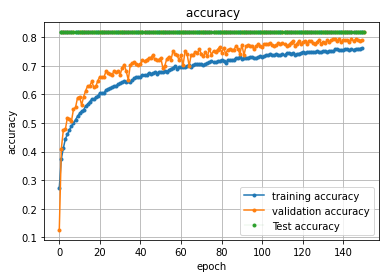

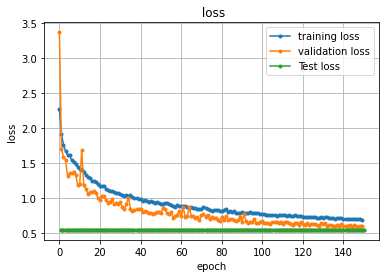

In [8]:
test_accuracy = np.array([np.ones((150)) * score[1]])
test_loss = np.array([np.ones((150)) * score[0]])
epoch = np.array([np.linspace(1,150,150)])


# Accuracy plots
plt.plot(history.history['accuracy'], marker='.', label='training accuracy')
plt.plot(history.history['val_accuracy'], marker='.', label='validation accuracy')
plt.plot(epoch,test_accuracy, marker='.',linewidth=0.1)
plt.plot(epoch[0],test_accuracy[0], marker='.',linewidth=0.1, label='Test accuracy')
plt.title(' accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.savefig('Task5_accuracyV1.jpeg')
plt.show()

# Loss plots
plt.plot(history.history['loss'], marker='.', label='training loss')
plt.plot(history.history['val_loss'], marker='.', label='validation loss')
plt.plot(epoch,test_loss, marker='.')
plt.plot(epoch[0],test_loss[0], marker='.',label='Test loss')
plt.title(' loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.savefig('Task5_lossV1.jpeg')
plt.show()